In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [25]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [24]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [26]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

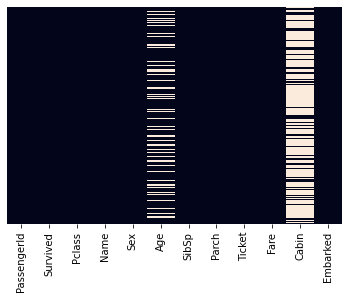

In [6]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

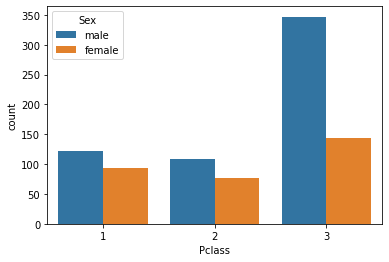

In [7]:
sns.countplot(x='Pclass', hue='Sex', data=train)

In [8]:
def mfc(passenger):
    age,sex = passenger
    
    if age < 16:
        return 'child'
    else:
        return sex

In [9]:
train['person'] = train[['Age', 'Sex']].apply(mfc,axis=1)

/Users/yayoliak14/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

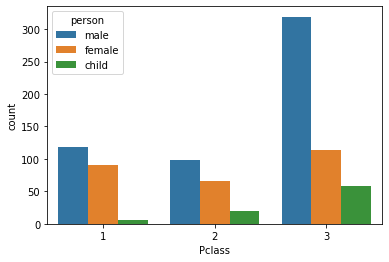

In [10]:
sns.countplot('Pclass',data=train,hue='person')

<AxesSubplot:>

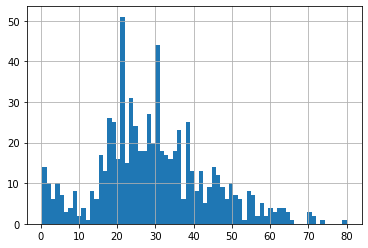

In [11]:
train['Age'].hist(bins=70)

In [12]:
train['Age'].mean()

29.69911764705882

In [13]:
train['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

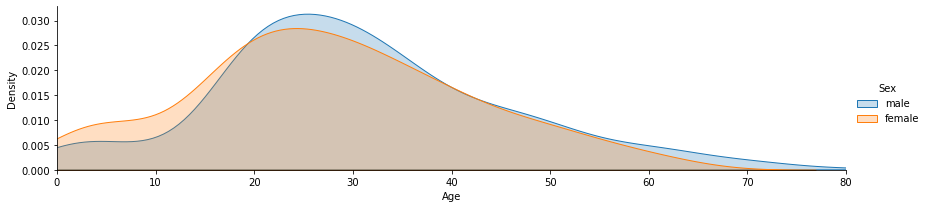

In [14]:
fig = sns.FacetGrid(train,hue='Sex',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

oldest = train['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

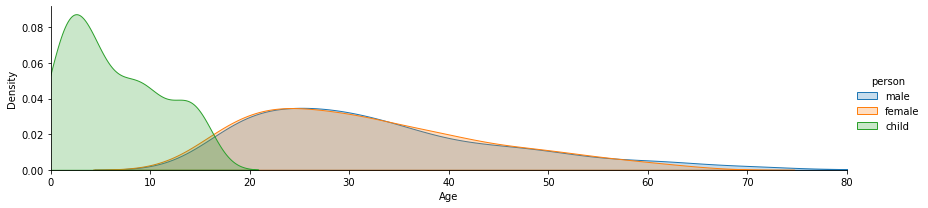

In [15]:
fig = sns.FacetGrid(train,hue='person',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

oldest = train['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

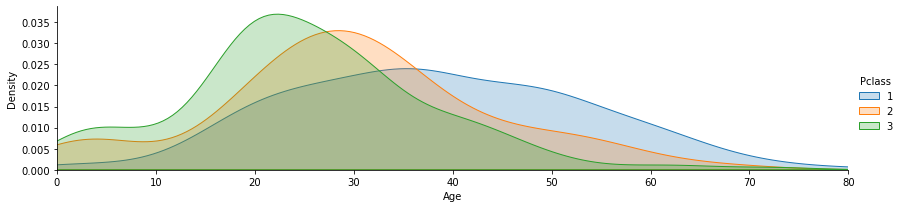

In [16]:
fig = sns.FacetGrid(train,hue='Pclass',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

oldest = train['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

In [17]:
deck = train['Cabin'].dropna()

In [18]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

/Users/yayoliak14/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cabin', ylabel='count'>

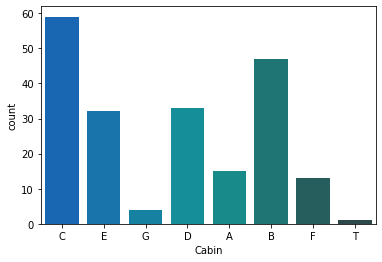

In [21]:
levels = []

for level in deck :
    levels.append(level[0])
    
cabin_df = pd.DataFrame(levels)

cabin_df.columns = ['Cabin']

sns.countplot('Cabin',data=cabin_df,palette='winter_d')

/Users/yayoliak14/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Embarked', ylabel='count'>

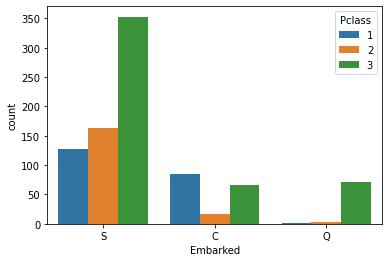

In [ ]:
sns.countplot('Embarked',data=train,hue='Pclass')

In [ ]:
train['Alone'] = train.SibSp + train.Parch
train['Alone']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Alone, Length: 891, dtype: int64

In [ ]:
train['Alone'].loc[train['Alone'] > 0] = 'With Family'
train['Alone'].loc[train['Alone']== 0] = 'Alone'

/Users/yayoliak14/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


/Users/yayoliak14/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Alone', ylabel='count'>

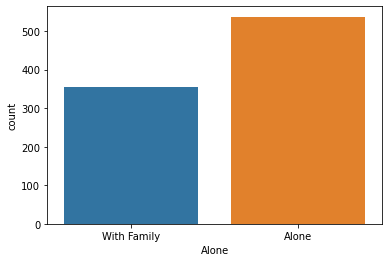

In [ ]:
sns.countplot('Alone',data=train)

/Users/yayoliak14/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survivor', ylabel='count'>

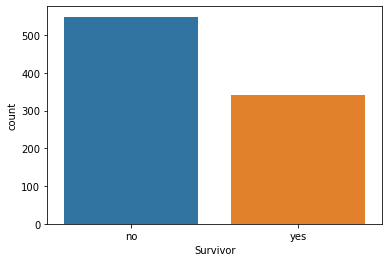

In [ ]:
train['Survivor'] = train.Survived.map({0: 'no',1:'yes'})

sns.countplot('Survivor',data=train)

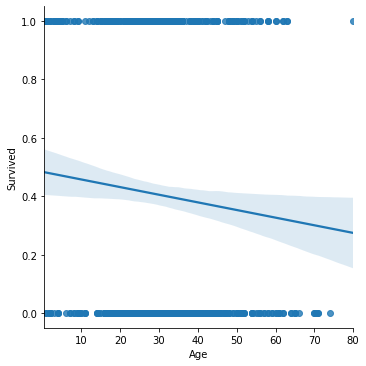

In [ ]:
sns.lmplot('Age','Survived',data=train)

/Users/yayoliak14/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


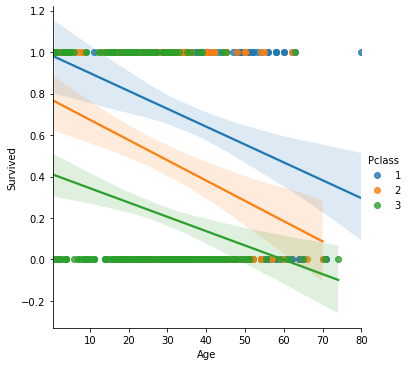

In [ ]:
sns.lmplot('Age','Survived',hue='Pclass',data=train)

/Users/yayoliak14/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


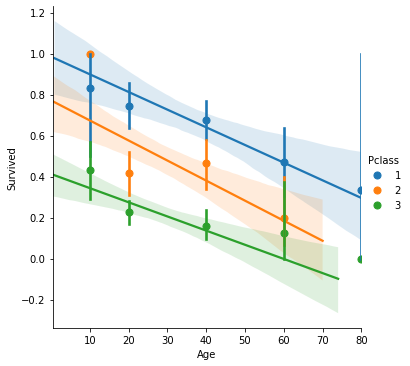

In [ ]:
generations = [10,20,40,60,80]

sns.lmplot('Age', 'Survived', hue="Pclass",data=train,x_bins=generations)

/Users/yayoliak14/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


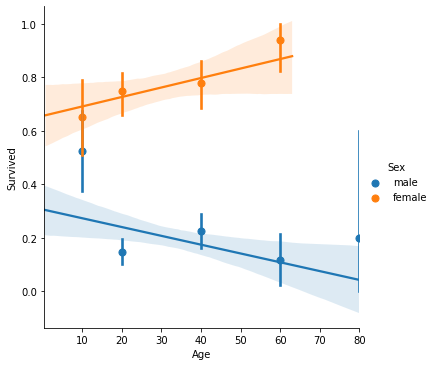

In [ ]:
sns.lmplot('Age', 'Survived',hue='Sex',data=train,x_bins=generations)